In [2]:
# Necessary imports

%matplotlib inline
import torch
import torch.nn as nn
from torchvision import datasets
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
import random
import os
import librosa
import librosa.display


## Generate Spectrograms
Basically convert a .wav or .mp3

[src/libmpg123/id3.c:process_extra():681] error: No extra frame text / valid description?
[src/libmpg123/id3.c:process_extra():681] error: No extra frame text / valid description?
[src/libmpg123/id3.c:process_extra():681] error: No extra frame text / valid description?
[src/libmpg123/id3.c:process_extra():681] error: No extra frame text / valid description?


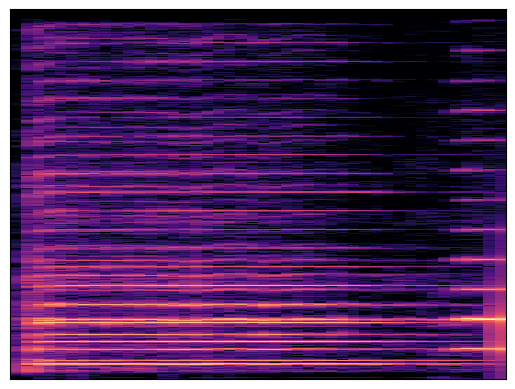

In [2]:
# Create spectrograms

# array of sound types available
sound_types = ["Snare", "Trumpet", "Violin"]

for sound_type in sound_types:

    # establish output directories
    # TODO: Add checks that directorties exist
    sound_dir = os.fsencode("../Sounds/" + sound_type)
    spec_dir = os.fsencode("../Spectrograms/" + sound_type)
    
    # remove all existing spectrograms
    for spec_file in os.listdir(spec_dir):
        
        filename = os.fsdecode(spec_file)
        
        if filename.endswith(".png"):
            os.remove(os.path.join(spec_dir, spec_file))

    for sound_file in os.listdir(sound_dir):

        filename = os.fsdecode(sound_file)

        if filename.endswith(".wav") or filename.endswith(".mp3" or filename.endswith(".flac")):

            y_orig, sr = librosa.load(os.path.join(sound_dir, sound_file), mono=True)

                        # Compute the Short-Time Fourier Transform (STFT)

            y = y_orig[:sr]

            D = librosa.stft(y)

            # Convert the amplitude spectrogram to decibels
            D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

            # Plot the spectrogram without axis labels or scales
            librosa.display.specshow(D_db, sr=sr, x_axis=None, y_axis=None)

            # Save the spectrogram as a PNG file
            output_file = os.path.join(spec_dir, os.fsencode(os.path.splitext(filename)[0] + ".png"))
            plt.savefig(output_file, bbox_inches='tight', pad_inches=0)

In [13]:
import csv

# Create arrays of ground truth data

sound_types = ["Snare", "Trumpet", "Violin"]

data = []

for sound_type in sound_types:

    # establish output directories
    # TODO: Add checks that directorties exist
    spec_dir = os.fsencode("../Spectrograms/" + sound_type)
    
    # remove all existing spectrograms
    for spec_file in os.listdir(spec_dir):
        
        filename = os.fsdecode(spec_file)
        
        if filename.endswith(".png"):

            data.append([os.fsdecode(os.path.join(spec_dir, spec_file)), sound_type])

key = lambda row: row[0] 

data.sort(key=lambda item: item[0])

with open('groundtruthdata.csv', 'w+') as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    wr.writerows(data)

## Create dataset class


In [22]:
import pandas as pd
# from skimage import io, transform
from torchvision import io
from torch.utils.data import Dataset, DataLoader

class InstrumentsDataset(Dataset):
    """Instruments dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Arguments:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.instrument_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.instrument_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.instrument_frame.iloc[idx, 0])
        image = io.read_image(img_name)
        instrument = self.instrument_frame.iloc[idx, 1]


        if self.transform:
            sample = self.transform(sample)

        return image, instrument


In [23]:
instruments_dataset = InstrumentsDataset(csv_file = "groundtruthdata.csv", root_dir = ".")

# for i, sample in enumerate(instruments_dataset):
#     print(i, sample['image'].shape, sample['instrument'])

train_size = int(0.8 * len(instruments_dataset))
test_size = len(instruments_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(instruments_dataset, [train_size, test_size])

0 (369, 496, 4) Snare
1 (369, 496, 4) Snare
2 (369, 496, 4) Snare
3 (369, 496, 4) Snare
4 (369, 496, 4) Snare
5 (369, 496, 4) Snare
6 (369, 496, 4) Snare
7 (369, 496, 4) Snare
8 (369, 496, 4) Snare
9 (369, 496, 4) Snare
10 (369, 496, 4) Snare
11 (369, 496, 4) Snare
12 (369, 496, 4) Snare
13 (369, 496, 4) Snare
14 (369, 496, 4) Snare
15 (369, 496, 4) Snare
16 (369, 496, 4) Snare
17 (369, 496, 4) Snare
18 (369, 496, 4) Snare
19 (369, 496, 4) Snare
20 (369, 496, 4) Snare
21 (369, 496, 4) Snare
22 (369, 496, 4) Snare
23 (369, 496, 4) Snare
24 (369, 496, 4) Snare
25 (369, 496, 4) Snare
26 (369, 496, 4) Snare
27 (369, 496, 4) Snare
28 (369, 496, 4) Snare
29 (369, 496, 4) Snare
30 (369, 496, 4) Snare
31 (369, 496, 4) Snare
32 (369, 496, 4) Snare
33 (369, 496, 4) Snare
34 (369, 496, 4) Snare
35 (369, 496, 4) Snare
36 (369, 496, 4) Snare
37 (369, 496, 4) Snare
38 (369, 496, 4) Snare
39 (369, 496, 4) Snare
40 (369, 496, 4) Snare
41 (369, 496, 4) Snare
42 (369, 496, 4) Snare
43 (369, 496, 4) Snar